<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_06/lab_06.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_06/data/anscombe.csv")

df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1. Separar por grupo:

In [5]:
df1 = df[df.grupo == 'Grupo_1']
df2 = df[df.grupo == 'Grupo_2']
df3 = df[df.grupo == 'Grupo_3']
df4 = df[df.grupo == 'Grupo_4']

1. Relizar gráfico scatter:

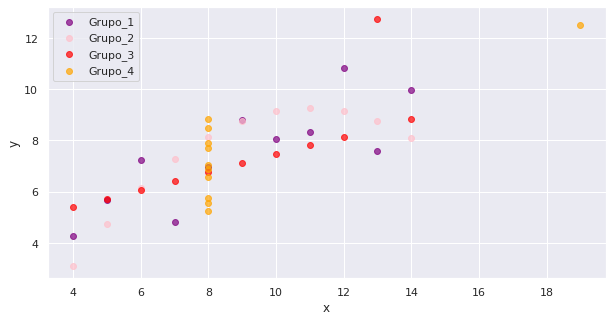

In [6]:
fig = plt.figure(figsize=(10, 5)) # ventana
plt.scatter(
    x = df1.x, # eje x
    y = df1.y, # eje y
    c="purple", # color
    alpha=0.7, # intensidad color
    label="Grupo_1" # etiquetdo fijando posicion
)
plt.scatter(
    x = df2.x, # eje x
    y = df2.y, # eje y
    c="pink", # color
    alpha=0.7, # intensidad color
    label="Grupo_2" # etiquetdo fijando posicion
)
plt.scatter(
    x = df3.x, # eje x
    y = df3.y, # eje y
    c="red", # color
    alpha=0.7, # intensidad color
    label="Grupo_3" # etiquetdo fijando posicion
)
plt.scatter(
    x = df4.x, # eje x
    y = df4.y, # eje y
    c="orange", # color
    alpha=0.7, # intensidad color
    label="Grupo_4" # etiquetdo fijando posicion
)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left')
plt.show()

1. Efectivamente, los grupos son muy distintos sobre todo sus curvaturas y 'datos anomalos'

2. Aplicar.describe() al grupo 1:


In [7]:
df1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


2. Aplicar .describe() al grupo 2:

In [8]:
df2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


2. Aplicar .describe() al grupo 3:

In [9]:
df3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


2. Aplicar .describe() al grupo 4:

In [10]:
df4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


2. Sorprendentemente la desviación estándar de x es igual en todos los grupos, en y son muy similarer, y la media es igual en x e y. y en general todas sus estadísticas están muy cerca.

3. Realizamos un afuste lineal y gráfico al grupo 1:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


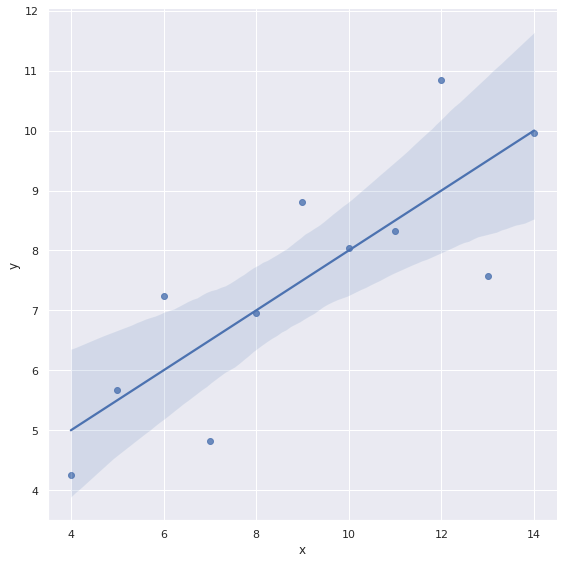

In [69]:
X1 = df1[['x']] # we only take the first two features.
y1 = df1['y']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
model1 = sm.OLS(y1_train, sm.add_constant(X1_train))
results1 = model1.fit()
sns.lmplot(
    x='x',
    y='y',
    data=df1,
    height = 8,
)  
plt.show()

3. Realizamos un afuste lineal y gráfico al grupo 2:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


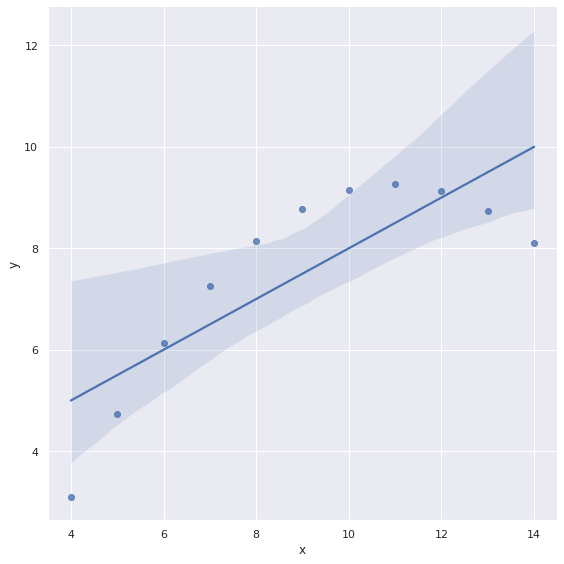

In [70]:
X2 = df2[['x']] # we only take the first two features.
y2 = df2['y']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
model2 = sm.OLS(y2_train, sm.add_constant(X2_train))
results2 = model2.fit()
sns.lmplot(
    x='x',
    y='y',
    data=df2,
    height = 8,
)  
plt.show()

3. Realizamos un afuste lineal y gráfico al grupo 3:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


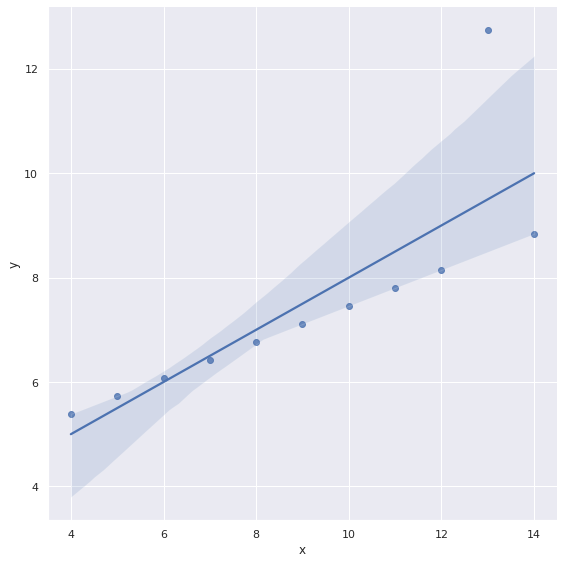

In [71]:
X3 = df3[['x']] # we only take the first two features.
y3 = df3['y']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
model3 = sm.OLS(y3_train, sm.add_constant(X3_train))
results3 = model3.fit()
sns.lmplot(
    x='x',
    y='y',
    data=df3,
    height = 8,
)  
plt.show()

3. Realizamos un afuste lineal y gráfico al grupo 4:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


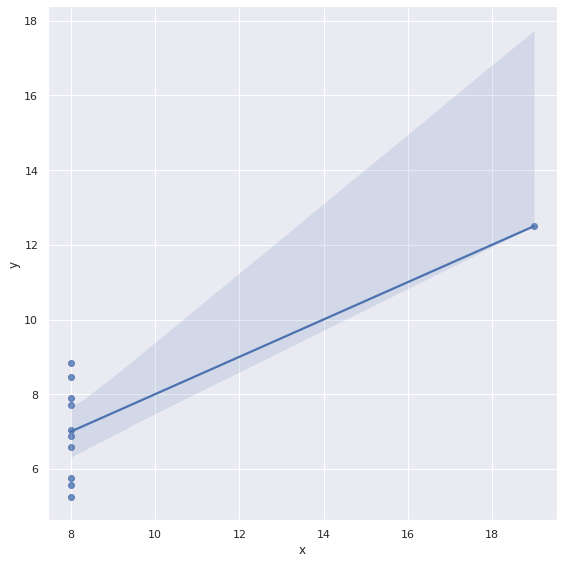

In [72]:
X4 = df4[['x']] # we only take the first two features.
y4 = df4['y']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)
model4 = sm.OLS(y4_train, sm.add_constant(X4_train))
results4 = model4.fit()
sns.lmplot(
    x='x',
    y='y',
    data=df4,
    height = 8,
)  
plt.show()

3. Notamos que las rectas son iguales, pasan por los mismos puntos.


4. Calculo de metricas MAE, MSE, MAPE y R cuadrado:

In [75]:
y1_pred = results1.predict(sm.add_constant(X1_test))
print('Errores del grupo 1:')
print('MAE:')
print(mse(y1_test,y1_pred,squared=False))
print('MSE:')
print(mse(y1_test,y1_pred))
print('MAPE:')
print(mape(y1_test,y1_pred))
print('R cuadrado:')
print(r2_score(y1_test,y1_pred))
y2_pred = results2.predict(sm.add_constant(X2_test))
print('Errores del grupo 2:')
print('MAE:')
print(mse(y2_test,y2_pred,squared=False))
print('MSE:')
print(mse(y2_test,y2_pred))
print('MAPE:')
print(mape(y2_test,y2_pred))
print('R cuadrado:')
print(r2_score(y2_test,y2_pred))
y3_pred = results3.predict(sm.add_constant(X3_test))
print('Errores del grupo 3:')
print('MAE:')
print(mse(y3_test,y3_pred))
print('MSE:')
print(mse(y3_test,y3_pred,squared=False))
print('MAPE:')
print(mape(y3_test,y3_pred))
print('R cuadrado:')
print(r2_score(y3_test,y3_pred))

#Error:
#ValueError: shapes (4,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)
#En y4_pred = results4.predict(sm.add_constant(X4_test))
#Cosa que no puedo explicar por que está todo definido como en clases

#y4_pred = results4.predict(sm.add_constant(X4_test))
#print('Errores del grupo 4:')
#print('MAE:')
#print(mse(y4_test,y4_pred))
#print('MSE:')
#print(mse(y4_test,y4_pred,squared=False))
#print('MAPE:')
#print(mape(y4_test,y4_pred))
#print('R cuadrado:')
#print(r2_score(y4_test,y4_pred))

Errores del grupo 1:
MAE:
0.993883096267443
MSE:
0.9878036090461594
MAPE:
0.11653417307488295
R cuadrado:
0.7572293056321073
Errores del grupo 2:
MAE:
1.437695570935484
MSE:
2.066968554687507
MAPE:
0.15686174720334095
R cuadrado:
0.21856695221824995
Errores del grupo 3:
MAE:
1.1772652819575127
MSE:
1.0850185629552669
MAPE:
0.10669458345492118
R cuadrado:
0.14316444099801173


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4. Las métricas son distintas

5. Como para los conjuntos los puntos varían mucho es mejor usar un método que asegure que la aproximación pasa por el punto, como la interpolación de lagrange o la interpolación spline cúbica(polinomio cubico de clase c2 entre los nodos) son buenas opciones. No veo necesario implementar uno de esos modelos ya que no es materia de este ramo y sabemos ya bien como se comportan.